In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

import os
import random

In [2]:
# Setup Image shape and batch size
IMAGE_SHAPE = (224, 224)

BATCH_SIZE = 64 #@param {type:"integer"}

In [3]:
data_dir = "C:/Users/yraj/Work/POCs/Dr. Greenry House/data"

In [4]:
# Data Preprocessing
# Inputs are suitably resized for the selected module. Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, esp. when fine-tuning.
validation_dir= "C:/Users/yraj/Work/POCs/Dr. Greenry House/data/validation"
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
# train_generator = train_datagen.flow_from_directory(
#     train_dir, 
#     subset="training", 
#     shuffle=True, 
#     seed=42,
#     color_mode="rgb", 
#     class_mode="categorical",
#     target_size=IMAGE_SHAPE,
#     batch_size=BATCH_SIZE)

Found 10861 images belonging to 38 classes.


In [5]:
# Now confirm that we can reload it, and it still gives the same results
# model = tf.keras.experimental.load_from_saved_model(export_path, custom_objects={'KerasLayer':hub.KerasLayer})
saved_model_path = 'C:/Users/yraj/Work/POCs/Dr. Greenry House/model'
model = tf.keras.models.load_model(saved_model_path)

In [6]:
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(data_dir, validation_dir, filename))
    img = cv2.resize(img, (IMAGE_SHAPE[0], IMAGE_SHAPE[1]) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

In [7]:
print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
img = load_image(filename)
prediction = predict(img)
print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
plt.imshow(img)
plt.figure(idx)    
plt.show()

NameError: name 'filename' is not defined

In [8]:
classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

0
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\f8101df7-db23-4241-9362-a00396806364___RS_GLSp 4336.JPG
SOURCE: class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot, file: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\f8101df7-db23-4241-9362-a00396806364___RS_GLSp 4336.JPG
1/1 [==============================] - 0s 84ms/step
PREDICTED: class: Corn_(maize)___Northern_Leaf_Blight, confidence: 0.986574


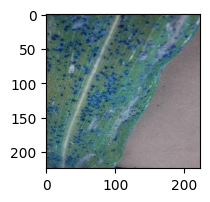

<Figure size 500x200 with 0 Axes>

1
Apple___healthy\86f6b322-e7af-4d91-b0c3-c5c6d6336fa5___RS_HL 7422.JPG
SOURCE: class: Apple___healthy, file: Apple___healthy\86f6b322-e7af-4d91-b0c3-c5c6d6336fa5___RS_HL 7422.JPG
1/1 [==============================] - 0s 73ms/step
PREDICTED: class: Apple___healthy, confidence: 0.999989


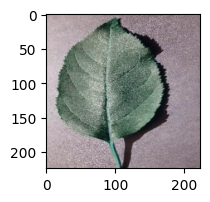

2
Apple___Apple_scab\dbf66e2f-cf58-418c-9dcd-14254af3ddb1___FREC_Scab 2934.JPG
SOURCE: class: Apple___Apple_scab, file: Apple___Apple_scab\dbf66e2f-cf58-418c-9dcd-14254af3ddb1___FREC_Scab 2934.JPG
1/1 [==============================] - 0s 77ms/step
PREDICTED: class: Pepper,_bell___Bacterial_spot, confidence: 0.818280


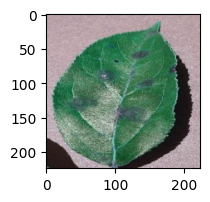

<Figure size 500x200 with 0 Axes>

3
Peach___healthy\98365918-af55-417f-bff4-91b93d0e257a___Rutg._HL 3659.JPG
SOURCE: class: Peach___healthy, file: Peach___healthy\98365918-af55-417f-bff4-91b93d0e257a___Rutg._HL 3659.JPG
1/1 [==============================] - 0s 77ms/step
PREDICTED: class: Peach___healthy, confidence: 0.999975


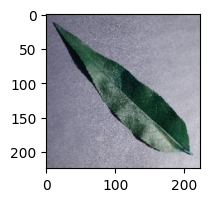

<Figure size 500x200 with 0 Axes>

4
Tomato___Tomato_Yellow_Leaf_Curl_Virus\b21db9f1-13df-4a1d-8ad5-b6f2edfc367c___YLCV_GCREC 2904.JPG
SOURCE: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, file: Tomato___Tomato_Yellow_Leaf_Curl_Virus\b21db9f1-13df-4a1d-8ad5-b6f2edfc367c___YLCV_GCREC 2904.JPG
1/1 [==============================] - 0s 80ms/step
PREDICTED: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, confidence: 1.000000


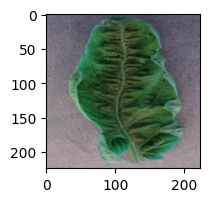

<Figure size 500x200 with 0 Axes>

In [16]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print(idx)
    print(filename)
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.rcParams["figure.figsize"] = (5,2)
    plt.figure(num=idx)    
    plt.show()

In [49]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print((type(idx)))
    print(filename)
#     print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
#     img = load_image(filename)
#     prediction = predict(img)
#     print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
#     plt.imshow(img)
#     plt.figure(idx)    
#     plt.show()

<class 'int'>
Corn_(maize)___healthy\63067c56-0462-4548-9b58-ffec723a5875___R.S_HL 7915 copy.jpg
<class 'int'>
Tomato___Early_blight\4ee9cff7-9693-4d51-821b-da31e5df240c___RS_Erly.B 7427.JPG
<class 'int'>
Grape___Black_rot\b25b0d71-87cf-4282-8d19-ff892142cbb7___FAM_B.Rot 0392.JPG
<class 'int'>
Corn_(maize)___Common_rust_\RS_Rust 2615.JPG
<class 'int'>
Tomato___Target_Spot\38063538-ea4f-4af0-a1e4-91e45db0f6e8___Com.G_TgS_FL 8189.JPG


In [17]:
os.path.split('Corn_(maize)___Northern_Leaf_Blight\e2fc31a8-6b0e-4c15-9fba-2024d2295827___RS_NLB 4229.JPG')[0]

'Corn_(maize)___Northern_Leaf_Blight'

In [51]:
def classify_disease(filename: str):
    import tensorflow as tf

    import numpy as np
    import matplotlib.pyplot as plt

    import os
    import random

    # Import OpenCV
    import cv2

    # Utility
    import random
    
    import itertools
    import random
    from collections import Counter
    from glob import iglob
    
    
    classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

    saved_model_path = 'C:/Users/yraj/Work/POCs/Dr. Greenry House/model'
    model = tf.keras.models.load_model(saved_model_path) # Loading Saved Model

    def load_image(filename):
        img = cv2.imread(os.path.join(data_dir, validation_dir, filename))
        img = cv2.resize(img, (IMAGE_SHAPE[0], IMAGE_SHAPE[1]) )
        img = img /255

        return img


    def predict(image):
        probabilities = model.predict(np.asarray([img]))[0]
        class_idx = np.argmax(probabilities)

        return {classes[class_idx]: probabilities[class_idx]}

    img = load_image(filename)
    prediction = predict(img)
    plt.imshow(img)
    return plt.figure(1), "PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0])   

In [52]:
imgae, text = classify_disease("C:/Users/yraj/Work/POCs/Dr. Greenry House/data/test/AppleCedarRust1.JPG")
imgae
print(text)

1/1 [==============================] - 0s 494ms/step
PREDICTED: class: Apple___Cedar_apple_rust, confidence: 0.966093


In [36]:
import streamlit as st
st.pyplot(imgae)

2023-05-20 02:59:00.080 
  command:

    streamlit run C:\Users\yraj\AppData\Local\miniconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [20]:
text = "Yash_Raj"
print(type(text.replace("_", " ")))

<class 'str'>


TypeError: heatmap() missing 1 required positional argument: 'data'

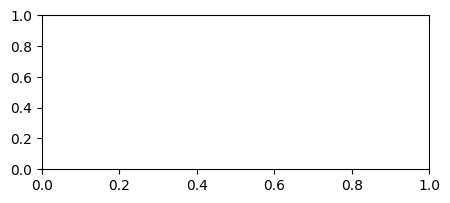

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.heatmap(df_col.corr(), ax=ax)
st.write(fig)

In [19]:

def print_name():
    print(p)
print_name()

yash
